# Introduzione ai dati

Studenti: *Cristina Pontalti* [209330], *Dominique Franzoi* [211305], *Sofia Dal Zotto* [211307]

### Sommario

* **Parte 1: Introduzione ai dati**
* Parte 2: Curve di Gumbel
         2.1 Metodo dei momenti
         2.2 Metodo della massima verosimiglianza
         2.3 Metodo dei minimi quadrati
* Parte 3: Test di Pearson
* Parte 4: Curve di Possibilità Pluviometrica

### Importazione delle librerie

In [1]:
import os
from pandas import*
import pandas as pd
import numpy as np
import datetime as datetime
import matplotlib.pyplot as plt
import math
from scipy.stats import genextreme,gumbel_r
from numpy import linspace
from statsmodels.distributions.empirical_distribution import ECDF
from IPython.display import Image
path = os.path.dirname(os.getcwd())
import plotly.express as px
import plotly.graph_objects as go

### Dettagli stazione metereologica

Si considerano i dati relativi alla stazione meteorologica di Mezzolombardo collocata ad un' altitudine di 225m s.l.m con le seguenti caratteristiche :

Stazione: T0090 \
Tavoletta n.: 32 043140 \
Coordinate Est/Nord: 661468/5119980 \
Latitudine: 46°12’51.2” N \
Longitudine: 11°05’36.2” E 

La stazione risulta esser stata dismessa il 05.03.2006 

In [2]:
os.chdir('C:\\Users\\Utente\\Desktop\\Progetti_Idrologia\\Progetto1_CurvePluviometriche\\Input')

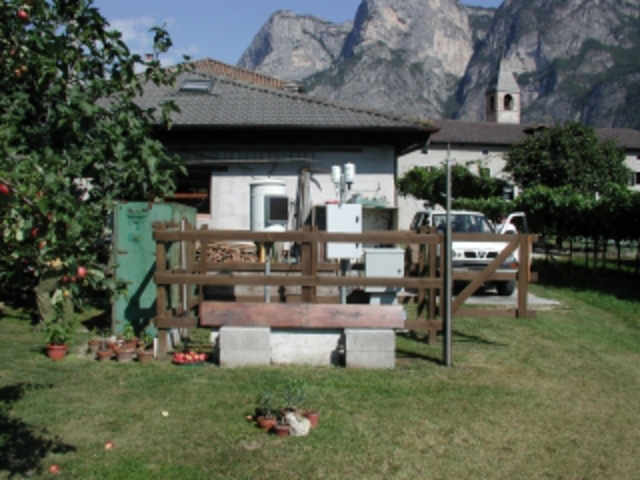

In [3]:
Image("Foto Stazione Mezzolombardo (convento).jpeg")

### Caricamento e visualizzazione dati 

Di seguito vengono importati e visualizzati i dati di massima precipitazione a Mezzolombardo nel periodo dal 1950 al 1990.

In [4]:
os.chdir('C:\\Users\\Utente\\Desktop\\Progetti_Idrologia\\Progetto1_CurvePluviometriche\\Input')

In [5]:
os.listdir()

['.ipynb_checkpoints',
 'by-nc-sa.eu_.png',
 'Dati_estremi_mezzolombardo.txt',
 'Foto Stazione Mezzolombardo (convento).jpeg']

In [27]:
dati = pd.read_csv('Dati_estremi_mezzolombardo.txt')
dati = dati.set_index('anno')
dati = dati.drop(['5 giorni'], axis = 1)
dati

,1 giorno,2 giorni,3 giorni,4 giorni
anno,,,,
1950,57.0,57.0,71.0,94.0
1951,90.6,112.5,122.0,141.9
1952,67.5,79.2,81.8,81.8
1953,44.5,77.1,94.5,110.8
1954,90.2,130.6,135.1,137.9
1955,50.6,68.1,70.4,70.4
1956,58.0,82.0,88.4,104.8
1957,85.2,104.7,108.0,108.9
1958,40.8,69.4,79.9,103.2


Viene ora riportata una rappresentazione grafica dei dati.

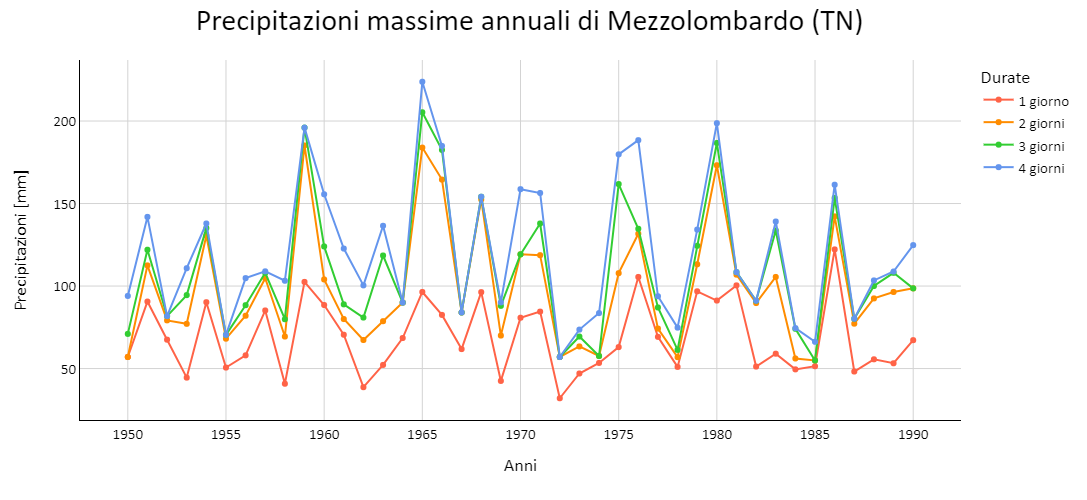

In [40]:
fig = px.line(height = 500)

paint = ["tomato","darkorange","limegreen","cornflowerblue"]

for i in range(len(dati.columns)):
    fig.add_trace(go.Scatter(x = dati.index, y = dati[dati.columns[i]], mode = 'markers, lines', name = dati.columns[i],
                             marker = dict(color = paint[i]), line = dict(color = paint[i])))

fig.update_layout(
    title = 'Precipitazioni massime annuali di Mezzolombardo (TN)',
    xaxis_title = "Anni",
    font_family = "Calibri",
    font_color = "Black",
    title_font_family = "Calibri",
    title_font_color = "Black",
    title_font_size = 30,
    title_x = 0.18,
    yaxis_title = "Precipitazioni [mm]",
    legend_title = "Durate",
    plot_bgcolor = 'white',
    font = dict(size = 15))

fig.update_xaxes(
    gridcolor = 'lightgrey',
    linecolor = 'black')

fig.update_yaxes(
    gridcolor = 'lightgrey',
    linecolor = 'black')

fig.show()

### Analisi dei dati

Si valutano alcune caratteristiche fondamentali dei dati

In [41]:
media = dati.mean()
varianza = dati.var()
std = dati.std()
cv = std/media

Di seguito vengono visualizzate numericamente e rappresentate graficamente 

###### MEDIA

In [42]:
media

1 giorno     68.709756
2 giorni     98.380488
3 giorni    108.846341
4 giorni    120.700000
dtype: float64

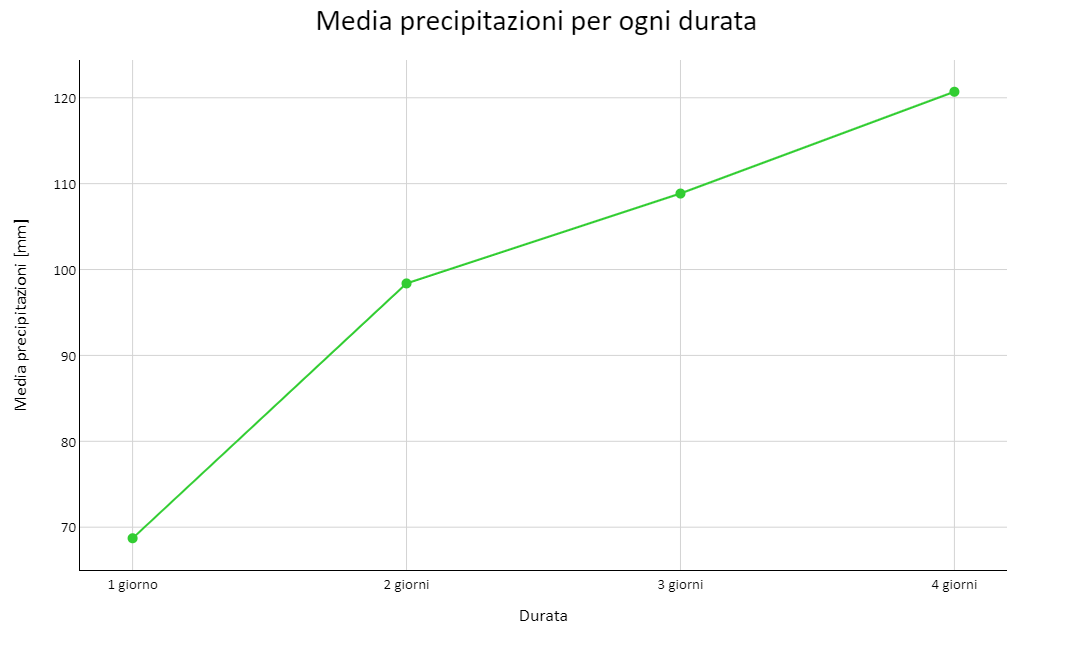

In [43]:
giorni = ['1 giorno', '2 giorni', '3 giorni', '4 giorni']

fig = px.line(width = 1000, height = 650)
fig.add_trace(go.Scatter(x = giorni, y = media, mode = 'markers, lines', name = '1 giorno', marker = dict(size = 10)))

fig.update_layout(
    title = 'Media precipitazioni per ogni durata',
    xaxis_title = "Durata",
    font_family = "Calibri",
    font_color = "Black",
    title_font_family = "Calibri",
    title_font_color = "Black",
    title_font_size = 30,
    title_x = 0.29,
    yaxis_title = "Media precipitazioni [mm]",
    plot_bgcolor = 'white',
    colorway = ['limegreen'],
    font = dict(size = 15))

fig.update_xaxes(
    gridcolor = 'lightgrey',
    linecolor = 'black')

fig.update_yaxes(
    gridcolor = 'lightgrey',
    linecolor = 'black',
)

fig.show()

###### VARIANZA

In [44]:
varianza

1 giorno     488.398902
2 giorni    1296.101110
3 giorni    1540.559049
4 giorni    1767.827000
dtype: float64

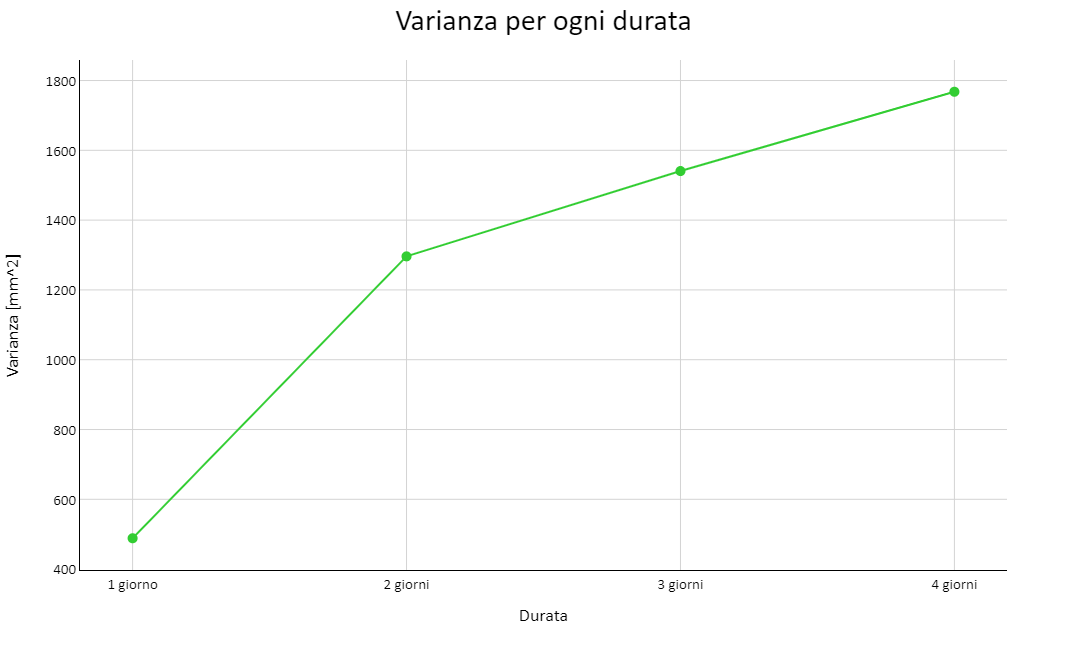

In [45]:
giorni = ['1 giorno', '2 giorni', '3 giorni', '4 giorni']

fig = px.line(width = 1000, height = 650)
fig.add_trace(go.Scatter(x = giorni, y = varianza, mode = 'markers, lines', name = '1 giorno', marker = dict(size = 10)))

fig.update_layout(
    title = 'Varianza per ogni durata',
    xaxis_title = "Durata",
    font_family = "Calibri",
    font_color = "Black",
    title_font_family = "Calibri",
    title_font_color = "Black",
    title_font_size = 30,
    title_x = 0.50,
    yaxis_title = 'Varianza [mm^2]',
    plot_bgcolor = 'white',
    colorway = ['limegreen'],
    font = dict(size = 15))

fig.update_xaxes(
    gridcolor = 'lightgrey',
    linecolor = 'black')

fig.update_yaxes(
    gridcolor = 'lightgrey',
    linecolor = 'black',
    
)

fig.show()

###### DEVIAZIONE STANDARD

In [46]:
std

1 giorno    22.099749
2 giorni    36.001404
3 giorni    39.249956
4 giorni    42.045535
dtype: float64

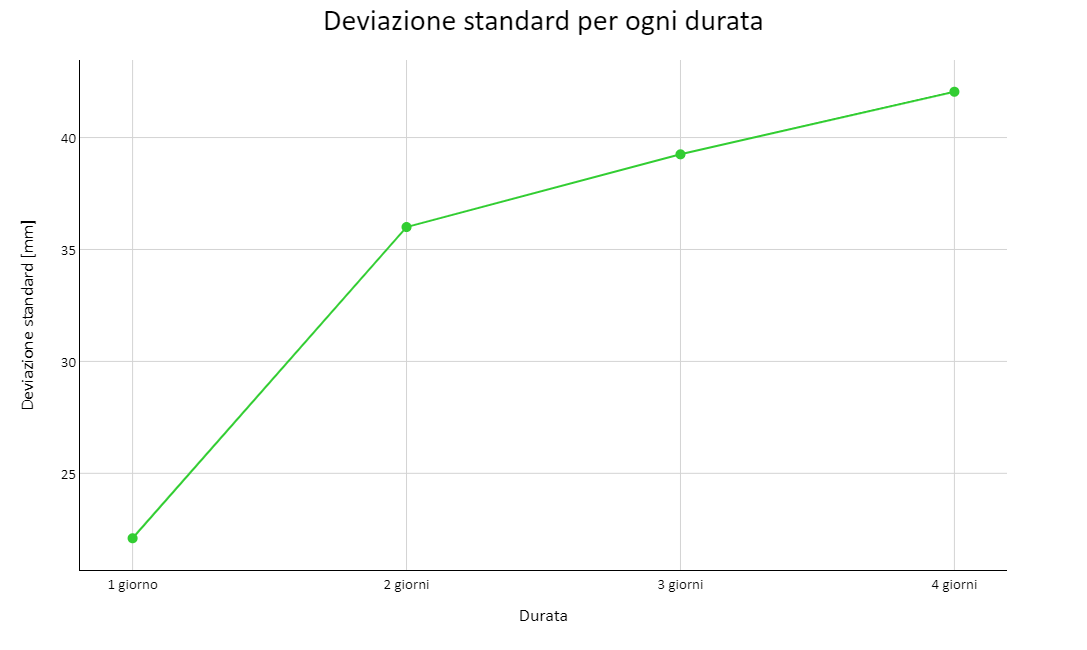

In [47]:
giorni = ['1 giorno', '2 giorni', '3 giorni', '4 giorni']

fig = px.line(width = 1000, height = 650)
fig.add_trace(go.Scatter(x = giorni, y = std, mode = 'markers, lines', name = '1 giorno', marker = dict(size = 10)))

fig.update_layout(
    title = 'Deviazione standard per ogni durata',
    xaxis_title = "Durata",
    font_family = "Calibri",
    font_color = "Black",
    title_font_family = "Calibri",
    title_font_color = "Black",
    title_font_size = 30,
    title_x = 0.50,
    yaxis_title = 'Deviazione standard [mm]',
    plot_bgcolor = 'white',
    colorway = ['limegreen'],
    font = dict(size = 15))

fig.update_xaxes(
    gridcolor = 'lightgrey',
    linecolor = 'black')

fig.update_yaxes(
    gridcolor = 'lightgrey',
    linecolor = 'black',
    
)

fig.show()

###### COEFFICIENTE DI VARIANZA

In [48]:
cv

1 giorno    0.321639
2 giorni    0.365940
3 giorni    0.360600
4 giorni    0.348347
dtype: float64

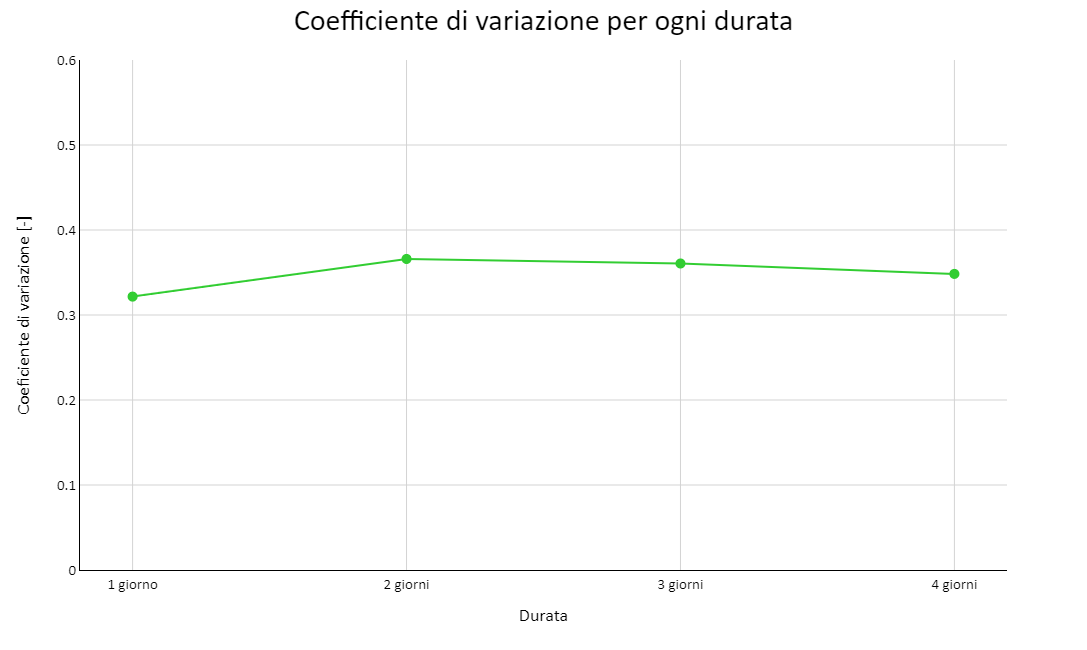

In [51]:
giorni = ['1 giorno', '2 giorni', '3 giorni', '4 giorni']

fig = px.line(width = 1000, height = 650)
fig.add_trace(go.Scatter(x = giorni, y = cv, mode = 'markers, lines', name = '1 giorno', marker = dict(size = 10)))

fig.update_layout(
    title = 'Coefficiente di variazione per ogni durata',
    xaxis_title = "Durata",
    font_family = "Calibri",
    font_color = "Black",
    title_font_family = "Calibri",
    title_font_color = "Black",
    title_font_size = 30,
    title_x = 0.50,
    yaxis_title = 'Coeficiente di variazione [-]',
    plot_bgcolor = 'white',
    colorway = ['limegreen'],
    font = dict(size = 15))

fig.update_xaxes(
    gridcolor = 'lightgrey',
    linecolor = 'black')

fig.update_yaxes(
    gridcolor = 'lightgrey',
    linecolor = 'black',
    range = list([0,0.6])
    
)

fig.show()

In [52]:
os.chdir('C:\\Users\\Utente\\Desktop\\Progetti_Idrologia\\Progetto1_CurvePluviometriche\\Input')

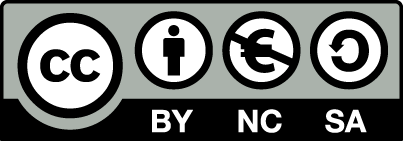

In [53]:
Image("by-nc-sa.eu_.png")